## California Census Data

Build a model of housing prices in the state of California.

*This dataset appeared in a 1997 paper titled Sparse Spatial Autoregressions by Pace, R. Kelley and Ronald Barry, published in the Statistics and Probability Letters journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).*

Statlib is closed now. But you can get the raw data from [Harry Wang](https://www.kaggle.com/datasets/harrywang/housing) on [Kaggle](https://www.kaggle.com/)

________________________________________________________________________________________________

The picture represents the main path to develop a Machine Learning Project

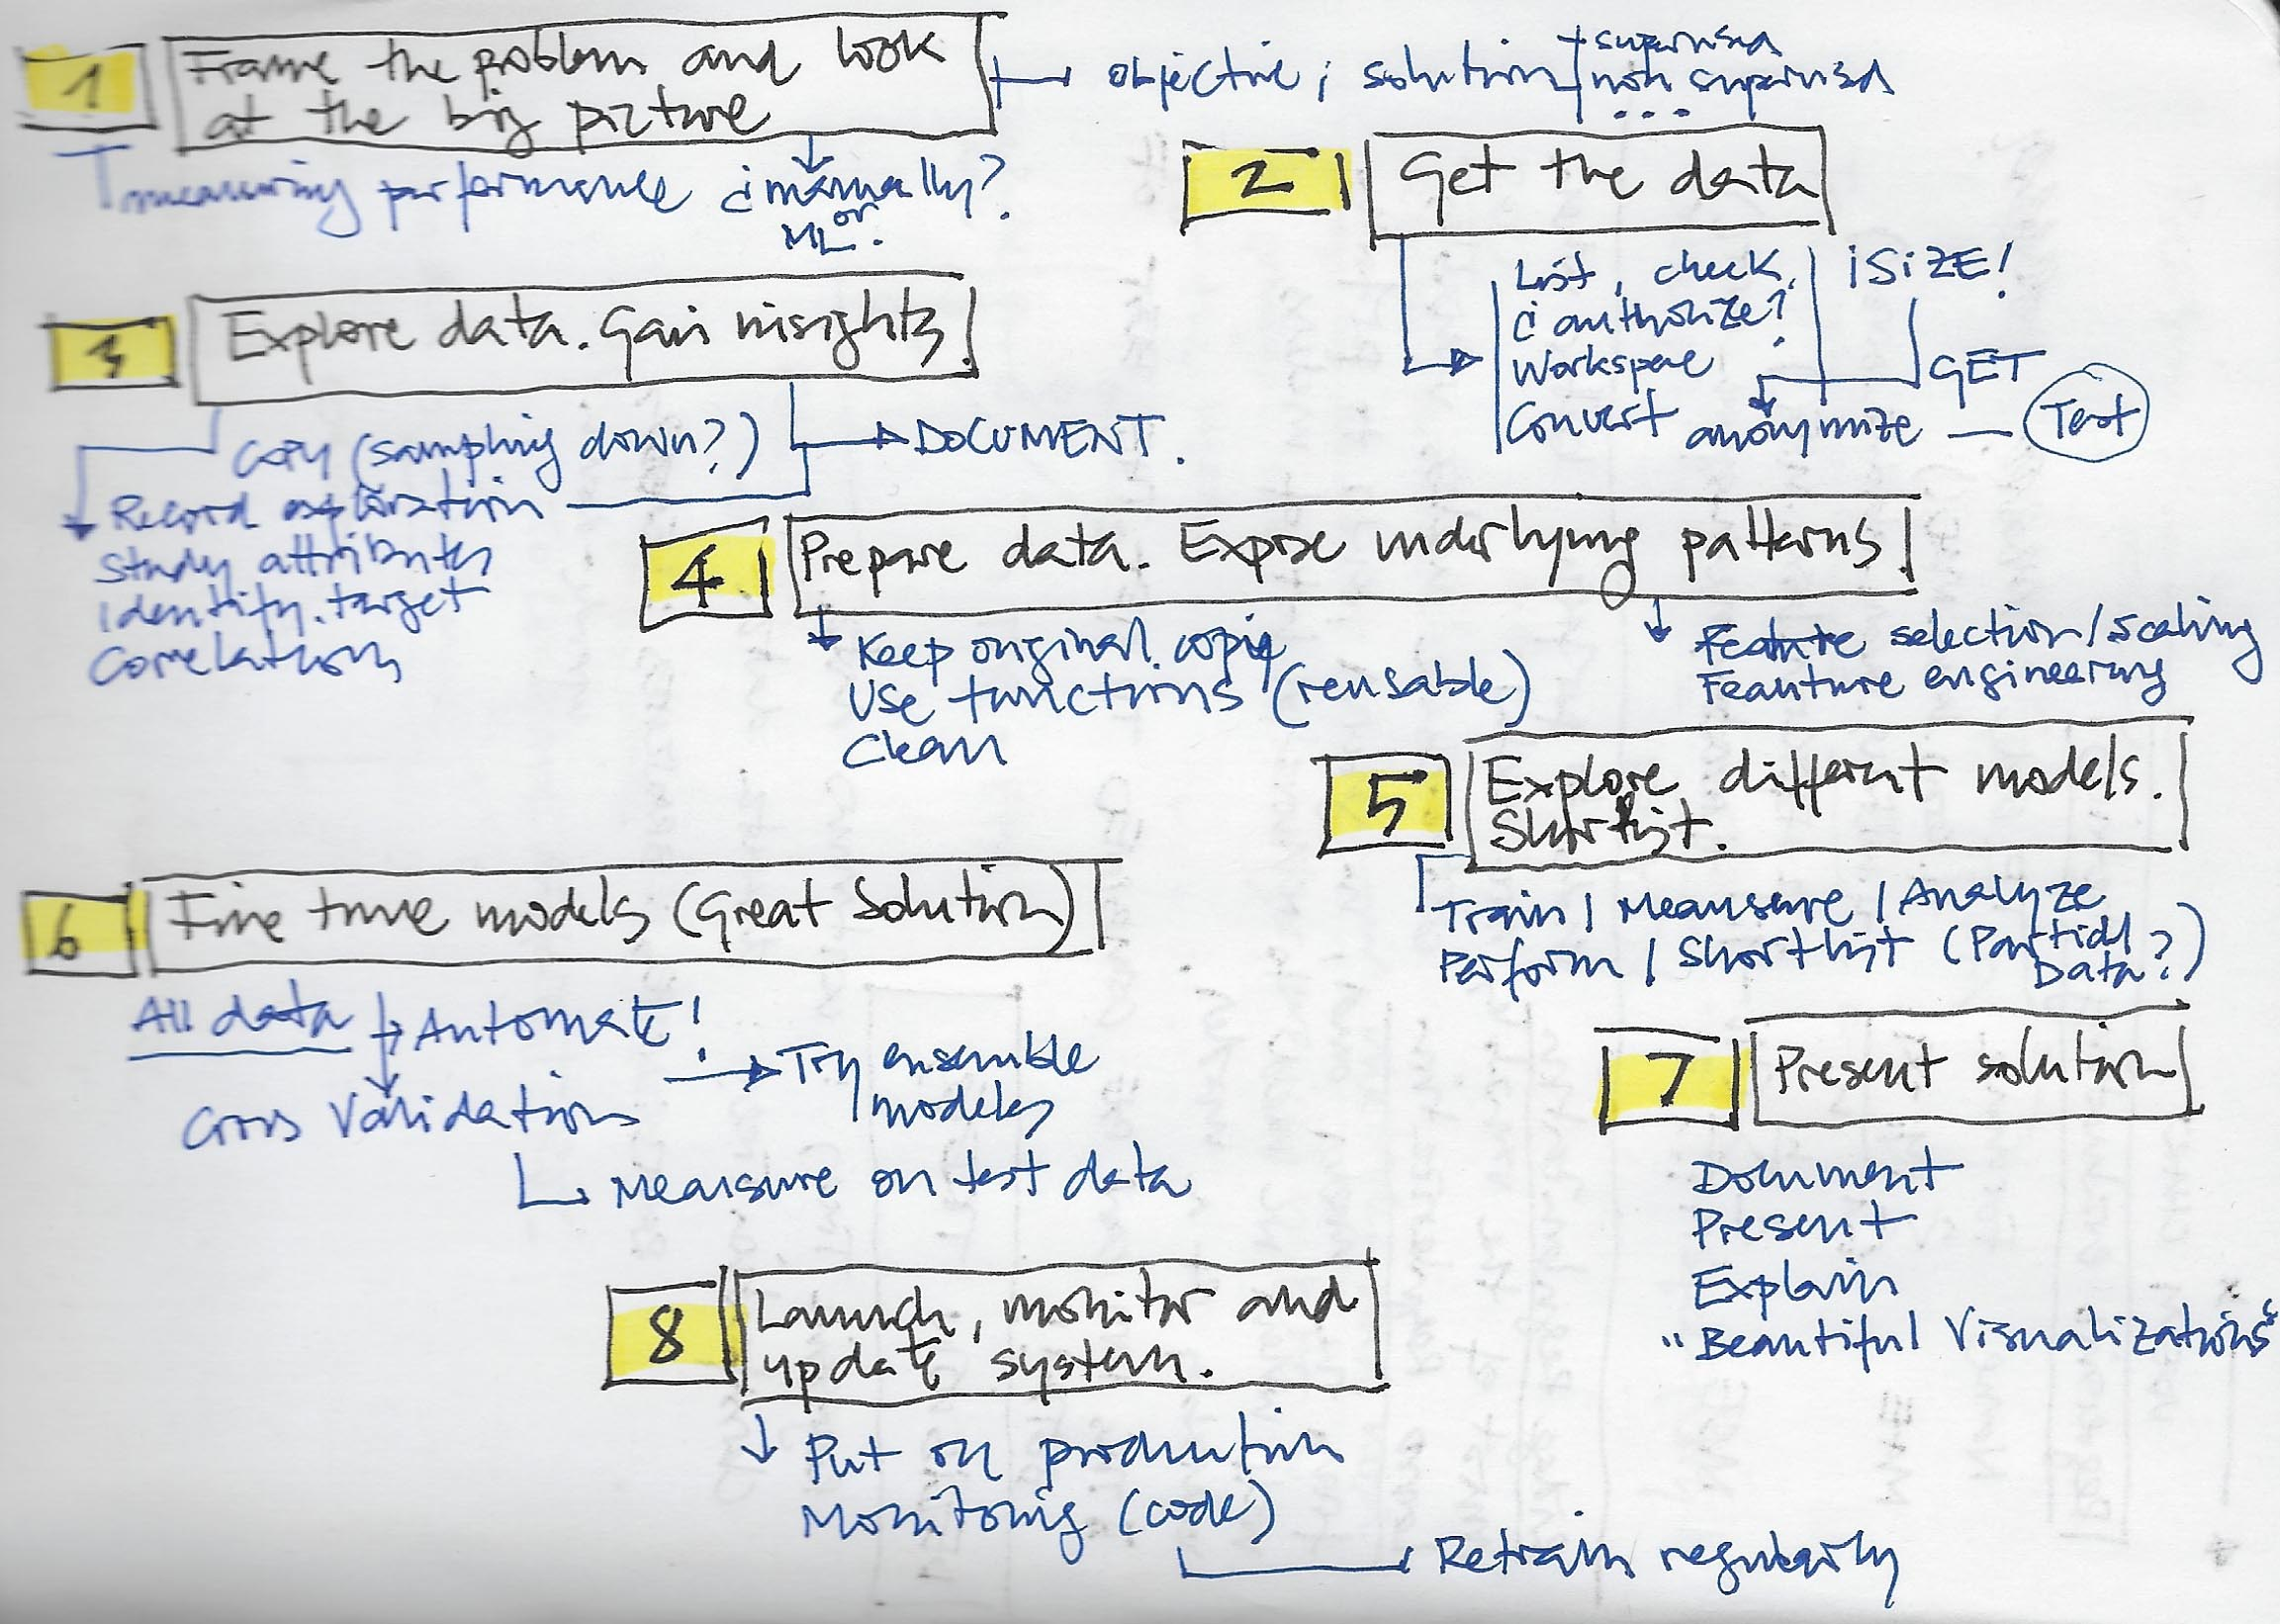

### First Decisions

At the start we need to ask ourselves about the project we are starting:

#### s___01

In this case, it is a problem of a **Supervised Learning** cause we have the labels to train with

It is also a **Regression** task as we need to predict a value. Being more specific, a **multiple regression** one; we have multiple features to make a prediction.

A **univariate regression** problem; we are only trying to predict one value for each district in the dataset.

No data in a continuos flow (staatic data) and the size of the database is small enough to not having memory issues (this means we can train and work with the whole dataset)

#### s___02

Select **Performance Measure**

In regression problems there are two most used meaures. RMSE and MSE (Root Mean Square Error and Mean Square Error).

In this case, as apparently, there are no many outliers, we are going to use RMSE. This is the formula:

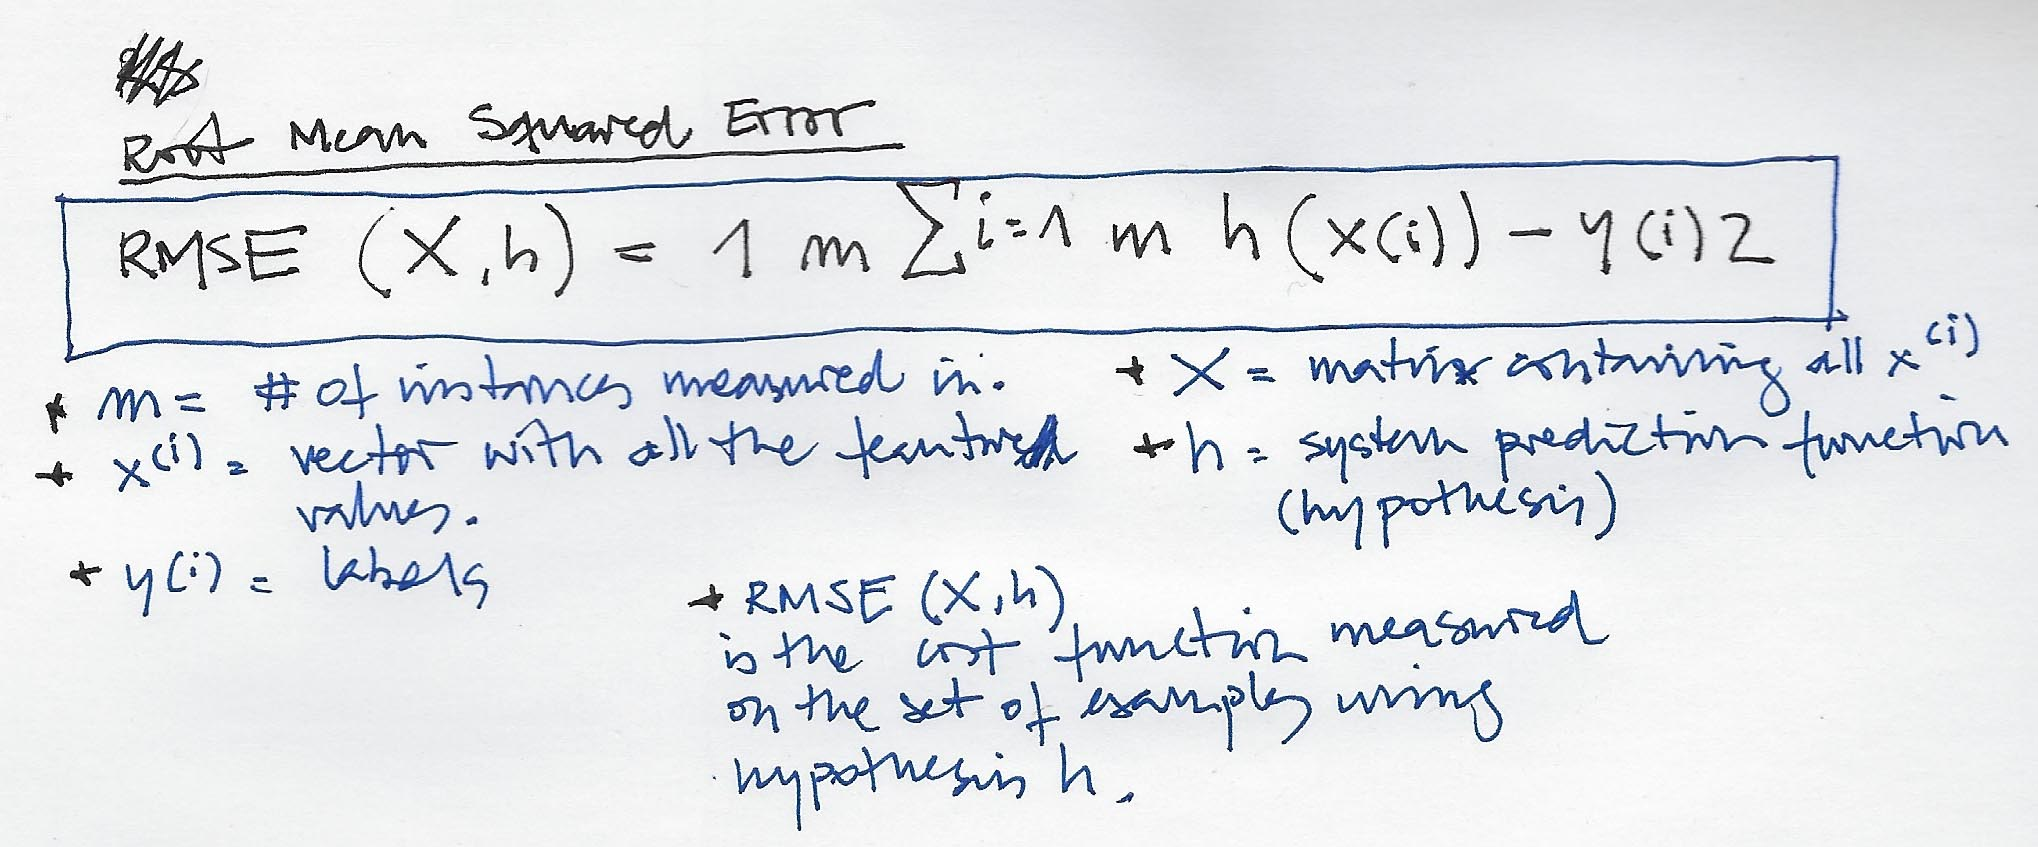

### Get Data

In [14]:
# import and load all the libraries needed
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

In [25]:
# Create a function to get .tgz dataset convert it into a csv file
# and load it as a pandas dataset called housing

def load_housing_data():
  tarball_path = Path('datasets/housing.tgz')
  if not tarball_path.is_file():
    Path('datasets').mkdir(parents=True, exist_ok=True)
    url='https://github.com/ageron/data/raw/main/housing.tgz'
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
      housing_tarball.extractall(path='datasets')
  return pd.read_csv(Path('datasets/housing/housing.csv'))


housing = load_housing_data()

In [26]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [17]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [18]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [19]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


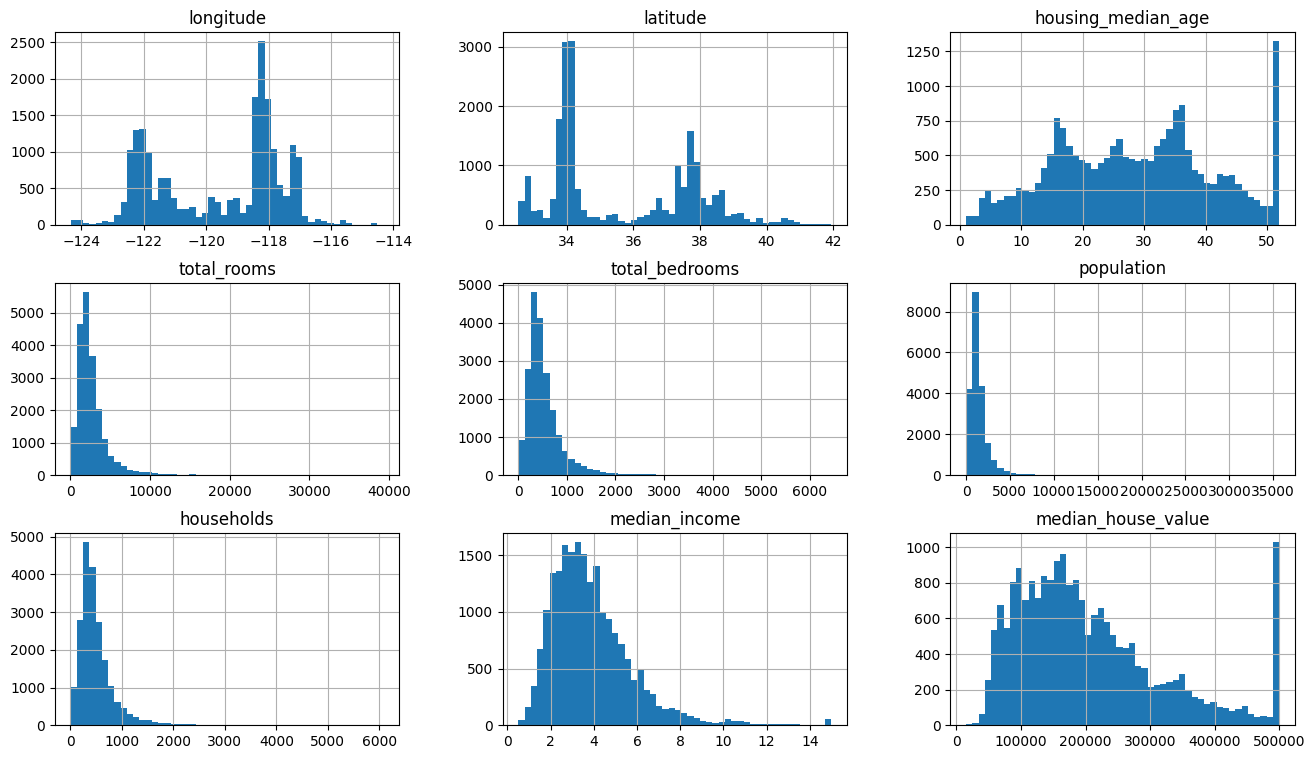

In [20]:
import matplotlib.pyplot as plt

housing.hist(bins=50,figsize=(16,9))
plt.show()

Fisrt analysis from this histograms:

* `housing_median_age`and `median_house_value`are capped. With the value we have a problem because is our **target**. we can't use it without making changes. We need to get rid of the values beyond 500000 to a correct model's train

* We need to try to transform this attributes to get a more symmetrical and bell-shaped distributions. It make eaiser for machine learnig algorithms to detect patterns. (Basic objective)

#### 👁️👁️ Note:

Before continue with some more data operation is much better to split the data and creta a **Test Set**

### Create Test Set

In [24]:
import numpy as np

def shuffle_and_split(data, test_ratio):
  np.random_set_seed(42)
  shuffle_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffle_indices[:test_set_size]
  train_indices = shuffle_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]



Above we have a raw function that create set and train split dataset.

`np.random.set_seed()` makes the randomness consistenly when we pass through data several times

There are other ways to do this, Scikit-Learn has `train_test_split`

In [22]:
from sklearn.model_selection import train_test_split

train_Set, test_Set = train_test_split(housing, test_size=0.2, random_state=42)

In [23]:
len(train_Set), len(test_Set)

(16512, 4128)

Until now we are splitting data randomly. This is ok if the dataset is large enough. If it is not the we are introducing (at least running the risk) significant sample bias.

#### Reducing possible samplig biases

If, in the preparation of the project we now that some value is very important (higly correlated), we'll want to ensure that the test and train datasets are representative of this values categories.

When this value is numeric we can apply some code to create some categories.

*📕 "It is important to have a sufficient number of instances in your dataset for each stratum, or else the estimate of a stratum's importance may be biased. This means that you should not  have too many strata, and each stratum should be large enough."*

In [27]:
# make five categories of `median_income`
housing["income_cat"]=pd.cut(housing['median_income'],
                      bins=[0,1.5,3.0,4.5,6,np.inf],
                      labels=[1,2,3,4,5])


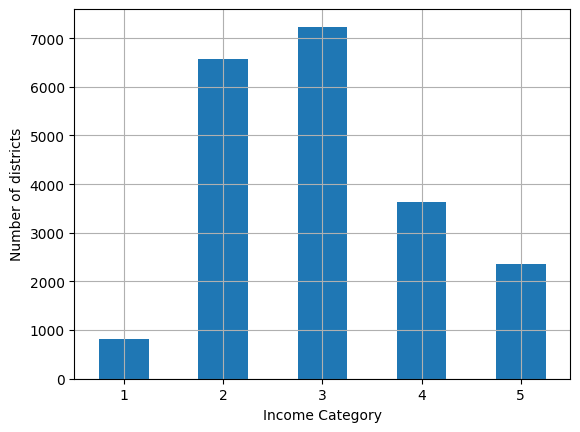

In [29]:
# Visualize this new categories in a bar chart
housing['income_cat'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel('Income Category')
plt.ylabel('Number of districts')
plt.show()

Having multiple splits could be useful if you better estimate your model performance.

This code generates 10 different stratified splits of the same dataset:

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2,random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing['income_cat']):
  strat_train_set_n = housing.iloc[train_index]
  strat_test_set_n = housing.iloc[test_index]
  strat_splits.append([strat_train_set_n,strat_test_set_n])


In [33]:
# Now we can select which of the splits use for the model
# In this case we are selecting the first one

strat_train_set, strat_test_set = strat_splits[0]

Widely use of this kind of strip make is the reason that we can use `train_test_split()` from ScikitLearn

In [34]:
stat_train_set, strat_test_set  = train_test_split(
    housing,
    test_size=0.2,
    stratify=housing['income_cat'],
    random_state=42
)

In [36]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

Since we've used 'incoming_cat' for splitting, we don't need it anymore.
WE can revert data

In [38]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop('income_cat', axis=1, inplace=True)

<ipython-input-38-3d3814eeeb24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop('income_cat', axis=1, inplace=True)


In [39]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3905,-121.95,37.11,21.0,2387.0,357.0,913.0,341.0,7.7360,397700.0,<1H OCEAN
16821,-118.01,33.89,36.0,1589.0,265.0,804.0,272.0,4.6354,202900.0,<1H OCEAN
2900,-118.18,33.74,30.0,5915.0,1750.0,2136.0,1503.0,4.0968,310000.0,NEAR OCEAN
7193,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310,314300.0,NEAR OCEAN
13928,-122.39,37.78,5.0,1405.0,515.0,725.0,392.0,3.6037,187500.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
12369,-124.16,40.79,46.0,3042.0,597.0,1206.0,541.0,2.1135,90600.0,NEAR OCEAN
8707,-119.01,35.39,29.0,1820.0,459.0,1134.0,419.0,1.8289,59400.0,INLAND
16634,-123.01,38.67,33.0,914.0,147.0,394.0,132.0,4.6875,246200.0,<1H OCEAN
9779,-122.03,37.60,24.0,2077.0,383.0,1488.0,389.0,4.5721,214700.0,NEAR BAY
